# House Prices

[Pedro Ruiz](https://pdroruiz.com/) - October 2023

[Kaggle](https://www.kaggle.com/pdroruiz) / [Portfolio](https://pdroruiz.com/portfolio/)

---

I have to admit that I am nervous about writing this paper. This is the first kernel I've published, not only in kaggle... but outside of a controlled environment.  
I hope that as a reader of this work you will be respectful and constructive. My door is always open to comments, proposals and suggestions, feel free to contact me if you wish. 

If this work can help and guide someone in the future, I will feel more than satisfied for the work done. 

**Please don't forget UPVOTE** ✌️

I can't wait to start, so .... let's get started!

<img src="https://d3iso9mq9tb10q.cloudfront.net/magefan_blog/p/a/painted-ladies-san-francisco-big-bus-tours-01.17_1.jpg" title="source:bigbustours.com" />

## **1.** Overview

---

This challenge has become very famous; in fact, it was mentioned several times during my training to illustrate various processes or tasks. Obviously, if you've reached this notebook, there's no doubt that we are dealing with a **regression challenge** in the real estate sector.

The contest instructions present us with the task of predicting housing prices based on various characteristics and attributes in a dataset.

To achieve this, several files are provided:
- `train.csv` - Training set.
- `test.csv` - Test set.
- `data_description.txt` - Complete description of benchmarks.
- `sample_submission.csv` - A sample of linear regression.

As you can imagine, there is not a single way to find the solution to this challenge. Therefore, I will try to employ different regression methods, and we will see the pros and cons of applying each of them.

The steps I will follow to achieve the goal are as follows:

1. **Overview** (you are here 🙂).
2. **Import Modules, Libraries, and the Dataset**.
3. **Data Preparation and Cleaning**.
4. **Descriptive Statistics, Visualization, and Data Analysis**.
5. **Predictions**.
6. **Conclusions**.

Can’t wait to start; if you’re all set, let’s jump right in!

## **2.** Import Modules, libraries and the Dataset.
---
The first thing to do is to set up the working environment and make sure you have all the tools you will need throughout the process. 
### Import libreries

In [1]:
import numpy as np                                                  # Algebra.
import pandas as pd                                                 # Manipulate data. 

In [2]:
import matplotlib.pyplot as plt                                     # Graphing data in the notebook
%matplotlib inline
import seaborn as sns                                               # Plugin with advanced styles

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [4]:
import folium                                                       # Generate maps

### Import data
The next step to get to work will be to load and take a look at the data... let's see what we find.

In [5]:
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


With a quick review and reading them diagonally, the data reveal some interesting first clues:

1. we have a set of 1460 rows × 81 columns.

2. From the series observed, we see that there are several tables with what appears to be a lot of null data. 

3. We see several tables with categorical data, which we will have to decide what to do with.  

Let's see what the target series looks like.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


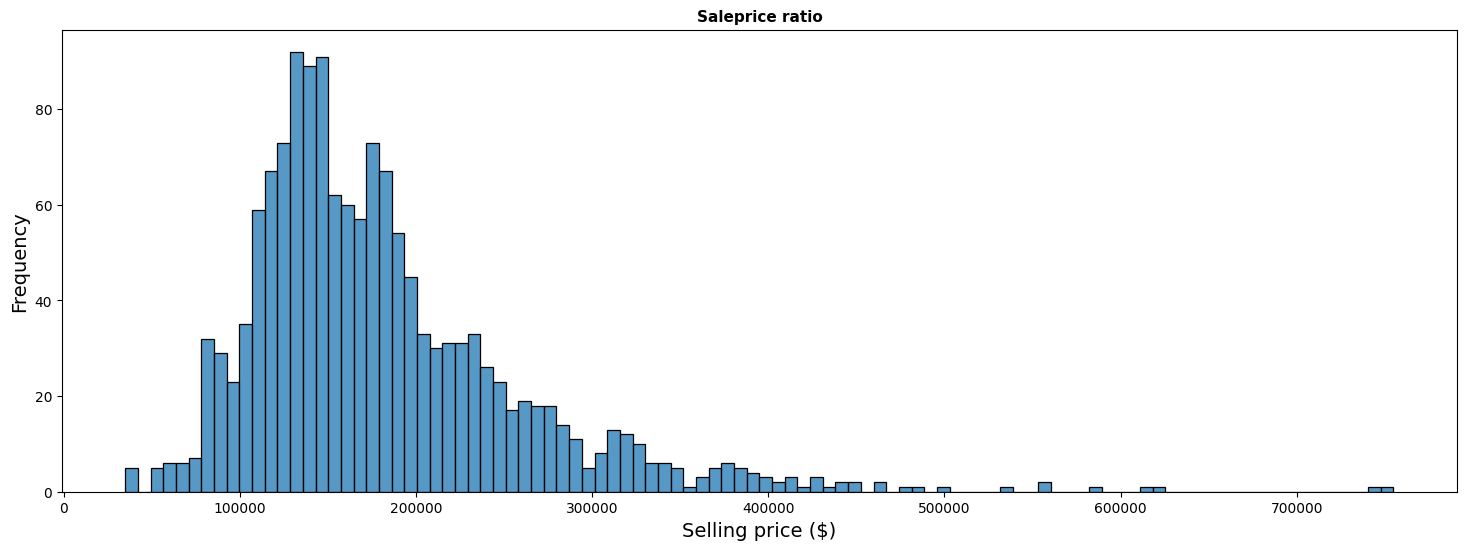

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
plt.figure(figsize=(18, 6))                                                                    # We create a figure and size it.

sns.histplot(train['SalePrice'], bins=100)                                                     # We create a histiogram, load the target series and indicate the number of bars in the plot.
plt.xlabel('Selling price ($)', fontsize=14)                                                   # We customize the x-axis label and size it.
plt.ylabel('Frequency', fontsize=14)                                                           # We customize the y-axis label.
plt.title('Saleprice ratio', fontdict={'fontsize': 11, 'fontweight': 'bold'})                  # We customize the title of the graph and add theme and weight.

plt.show()                                                                                     # We Plotting.

print(train['SalePrice'].describe())                                                           # We paint a descriptive table of the series data.

EN DI- Reviewing the graph we can observe a distribution skewed to the left, characterized by a large number of lower priced property sales, which peaks at around \\$160,000. From this point on, property sales gradually decrease until they reach the \\$500,000 figure, from which point we can observe outliers representing sales of high value or luxury properties. 

- The descriptive information we have loaded below the graph supports the above observations by showing us that although the mean of the sales stands at \\$163,000, the median is dragged down to \\$181,000 due to the influence of the luxury property sales outliers.

With this we can get a first idea of the distribution of the `Saleprice` series. 

In the next section we will prepare all the data to further explore their interrelationship and extract as much information as possible.

This is only the beginning!

## **3.** Prepare and cleanse the data.
---
From here, I must comment that the actions we will take with the data, in a professional environment, should be done by carefully assessing the future repercussions that these decisions may cause... but as this is a challenge and we have come to play.... let's sharpen the axe!

In this section we are going to explore the data in search of atypical, null, categorical and all those data that we will not be able to manage in our models, and try to find the best solution in each case.

Let's start with an overview of the data:

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Well, seeing the info response, I've been checking the training data set and the test data set... and they have the same composition, minus the target series in the test set.....  so I don't see the need to paint it on the screen, you'll just have to trust me. 🙂 

- As we have said above, in the data set we observe a large number of series with categorical variables. 
- At the same time, we can identify three large groups of series with null values:
1. devoid of null values.
2. With few null values.
3. With many null values.

I think it would be best to start by identifying and isolating the latter series:

In [8]:
columns_to_impute_train = []
columns_to_remove_train = []

columns_to_impute_test = []
columns_to_remove_test = []

for column in train.columns:                                                       # Loop for traversing the dataset
    null_count = train[column].isnull().sum()                                      # We create a variable to store the sum of null values of the iterated series
    if null_count >= 500:                                                          # If the value is greater than or equal to 500 store it in columns to be removed
        columns_to_remove_train.append(column)
    elif null_count >= 1:                                                          # With the above filtering, if the value is less than 500 or greater or equal to 1 store it to impute it
        columns_to_impute_train.append(column)
    else:                                                                          # If it does not match the above parameters (if complete) do nothing.
        pass

for column in test.columns:                                                        # We repeat with the test dataset
    null_count = test[column].isnull().sum()
    if null_count >= 500:
        columns_to_remove_test.append(column)
    elif null_count >= 1:
        columns_to_impute_test.append(column)
    else:
        pass

print("Columns to impute in train ", columns_to_impute_train, '\n')
print("Columns to remove in train: ", columns_to_remove_train, '\n')

print("Columns to impute in test: ", columns_to_impute_test, '\n')
print("Columns to remove in test: ", columns_to_remove_test)

Columns to impute in train  ['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'] 

Columns to remove in train:  ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] 

Columns to impute in test:  ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'] 

Columns to remove in test:  ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


Great!

In this way we have quickly traversed both sets and isolated the affected columns quite efficiently. 

Now let's start by pruning all those branches of the set that are of no use to us due to their large number of null values... Although some of these variables could become useful to us and could be interesting... I will choose to eliminate them and not to lengthen the work more than necessary.

In [9]:
train_clean = train.drop(columns_to_remove_train, axis=1)                                   # We get rid of the series we are not interested in and store them in a new variable.
test_clean = test.drop(columns_to_remove_test, axis=1)                                      # We repeat with the test dataset

print("No. of columns:",train_clean.shape[1]," - vs - ", train.shape[1])

No. of columns: 75  - vs -  81


Excellent, having already addressed the most problematic columns, it is time to focus on all those series that contain categorical variables. 

I think it is essential to try to lose as little information as possible for our analysis and treating these variables properly will be fundamental to advance in our task. Let's get to work!

In [10]:
cat_columns_train = train_clean.select_dtypes(include=['object'])                          # In the same way we will isolate all series with categorical data.
cat_columns_test = test_clean.select_dtypes(include=['object'])                            

print(cat_columns_train.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


Now that we have identified all the columns we want to transform, we will pass them through LabelEncoder, which will transform this data into numeric categories.

In [11]:
label_encoder = LabelEncoder()                                                             # We load LabelEncoder

for columna in cat_columns_train.columns:                                                  # We create a for loop to loop through the categorical series
    train_clean[columna] = label_encoder.fit_transform(train_clean[columna])               # We replace the series in the clean DS with the LabelEncoder transformation.

for columna in cat_columns_test.columns:
    test_clean[columna] = label_encoder.fit_transform(test_clean[columna])
    
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Wonderful, I love harmonized data sets.

Now we will continue and proceed to submit the columns to be imputed to the KNN process, this way we will complete the missing data using the data from the 5 most similar tuples.

In [12]:
knn_imputer_train = KNNImputer(n_neighbors=5, metric='nan_euclidean')                                           # We create an imputer that selects the 5 closest ones and apply an ecludian distance.
knn_imputer_train.fit(train_clean[columns_to_impute_train])                                                     # We train the imputer with the DS

train_clean[columns_to_impute_train] = knn_imputer_train.transform(train_clean[columns_to_impute_train])        # And apply the transformation of the series with missing data on itself


knn_imputer_test = KNNImputer(n_neighbors=5, metric='nan_euclidean')
knn_imputer_test.fit(test_clean[columns_to_impute_test])

test_clean[columns_to_impute_test] = knn_imputer_test.transform(test_clean[columns_to_impute_test])


print("No. of nulls in the dataset: ", train_clean.isnull().sum().sum())

No. of nulls in the dataset:  0


Excellent. It is gratifying when the data aligns with our intentions.

Now, the complexity of our analysis is going to start to increase. 

Let's move on to the next phase of our research.

## **4** Descriptive statistics, data visualization and analysis
---
In this section we will try to approach the representation of the data in a graphical and understandable way in order to visually explore its relationship with the target selling price variable. In this way, we will try to better understand the data set. How the variables relate to the selling price and thus try to extract as much information as possible before building our models.

Let's move on!

Personally, I prefer to start descriptive analyses of a few variables using a correlation matrix. This makes the pre-analysis very logical and visual, allows us to identify connections between the different variables, and from there, start exploring in depth. 

However, this would only work with small caliber data sets, as the data set grows... this would not only significantly increase the request processing time, but would also result in a monstrous mosaic that is totally out of scale. 

So let's start by looking at which factors are most closely related to our target series, and when it's clearer, we'll look at the correlation matrix.

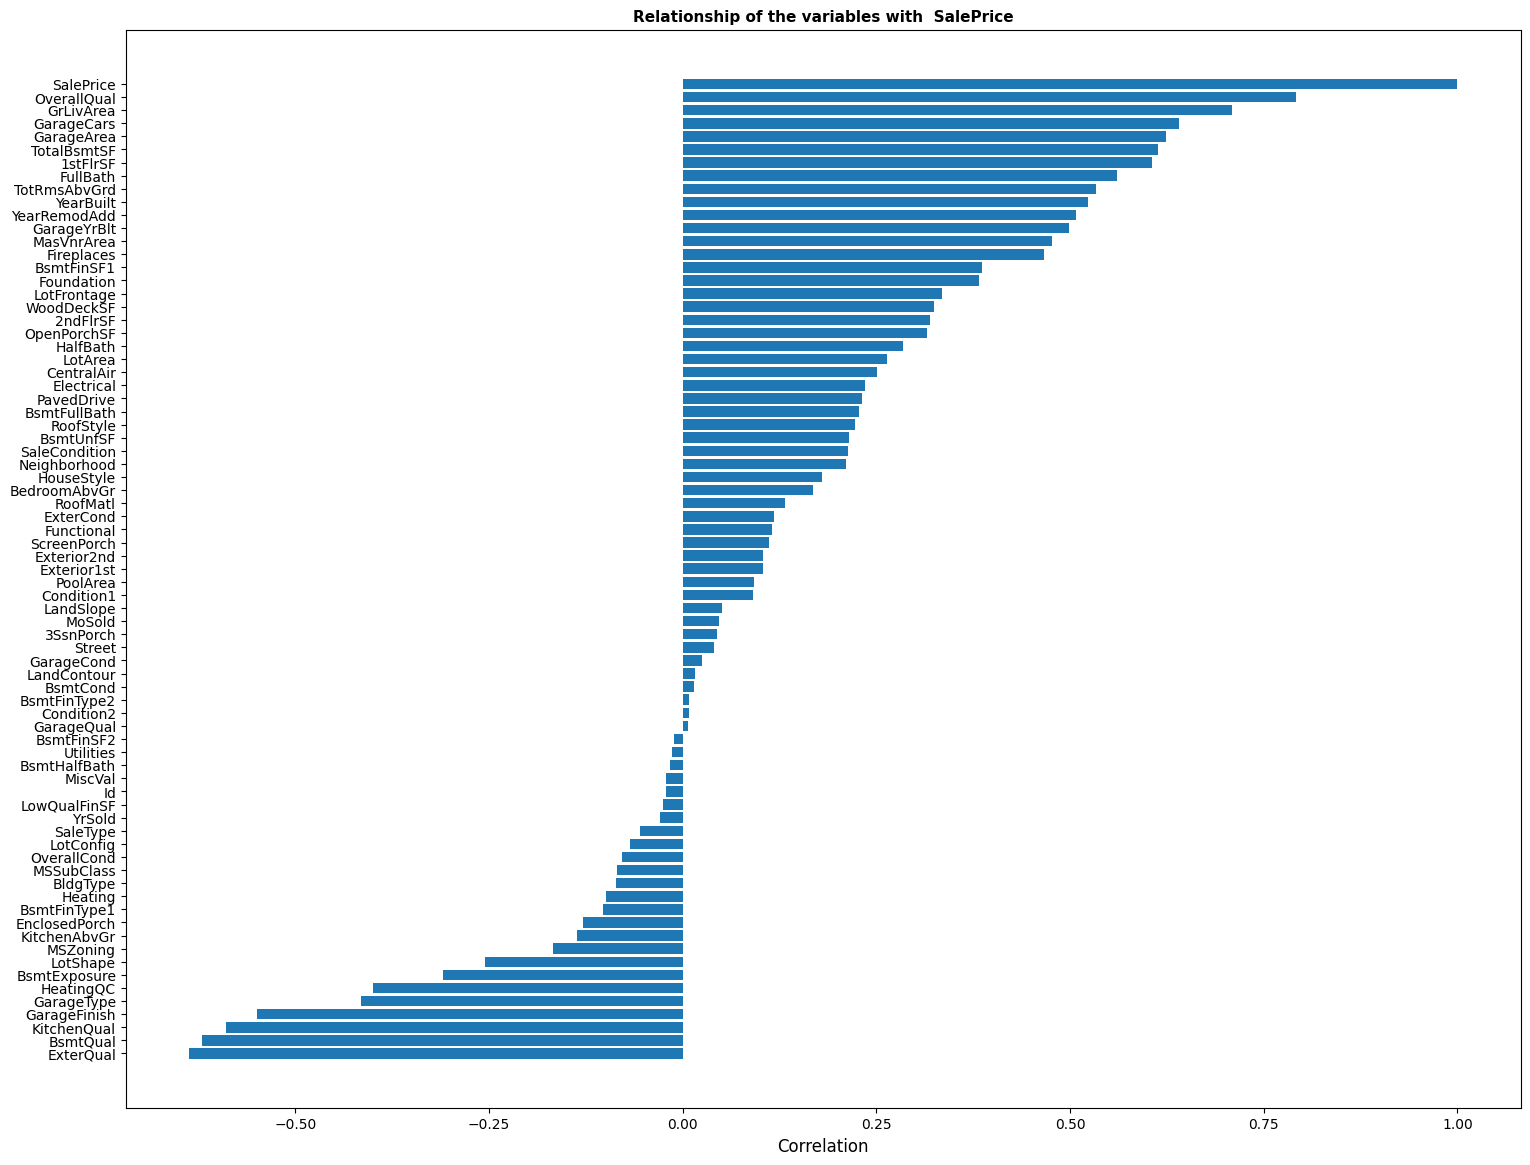

In [13]:
corr = train_clean.corr()                                               # We create a DS correlation
corr_sale = corr['SalePrice'].sort_values(ascending=False)              # we create a variable with the correlation with the target variable and order from highest to lowest

plt.figure(figsize=(18, 14))                                            # We create a figure and give it dimension

plt.barh(corr_sale.index, corr_sale.values)                             # We create a horizontal bar chart and indicate the axes.
plt.xlabel("Correlation", size=12)
plt.ylabel("")
plt.title("Relationship of the variables with  SalePrice", fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.gca().invert_yaxis()                                                # We invert the axis so that they are displayed in descending order.

plt.show()

Excellent, this puts us in a good position to start exploring.

In this horizontal bar chart we can see the relationship of all the variables to the sales price series. 

I find this very curious, I have always heard the real estate mantra of "location, location, location" for the increase in value of a property... but it seems that in Ames, Iowa this is not the case, (this is a thorn in my side with this data set and I need to check if it is entirely true or the data shows us a hooked reality) and what is more expensive are qualities and dimensions, which to tell the truth also seems logical and determinant to me. 

In another situation, it would have been ideal to explore in more detail the interrelationships between all the variables and how they interact with each other. However, as our priority is to focus on the challenge and not to make the notebook too long, we will leave it aside. 

We will logically ignore the relationship that the selling price has with itself, and analyze the first 10 variables that have a direct impact on the selling price.

Let's see what secrets the data set hides...

In [14]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

First, it is important to note that we are located in Ames, Iowa. This geographic information is relevant for anyone unfamiliar with the area, as I am.

In [15]:
ames_map = folium.Map(location=[42.0308, -93.6319], zoom_start=14)
ames_map

When I saw the relationship of the variables with the sale price, my first thought was to create a heat map, in order to find out why the location of the properties has little relevance in the final price... But when I took a closer look at the data set, I discovered that all or almost all of them are located on the same street.

In [16]:
street_count = train['Street'].value_counts()
print(street_count)

Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Great, one less thing!
Now let's look at the most relevant variables with the selling price of the houses... this step is dispensable, but I like to understand how the data interacts with each other. If you are not interested in this part of the work you can skip it, it is not determinant for the final result. 

#### OverallQual
---

Rates the overall material and finish of the house

Next, as we are interested in the relationship with our target variable, we will analyze two aspects: first, the distribution of the variable to be treated and then the relationship with our target variable. In this case, the qualities of the houses and their trend, and the relationship of these qualities with the selling price.

According to the data provided to us, the qualities of the properties are classified on a scale from 1 (Very poor) to 10 (Very excellent).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


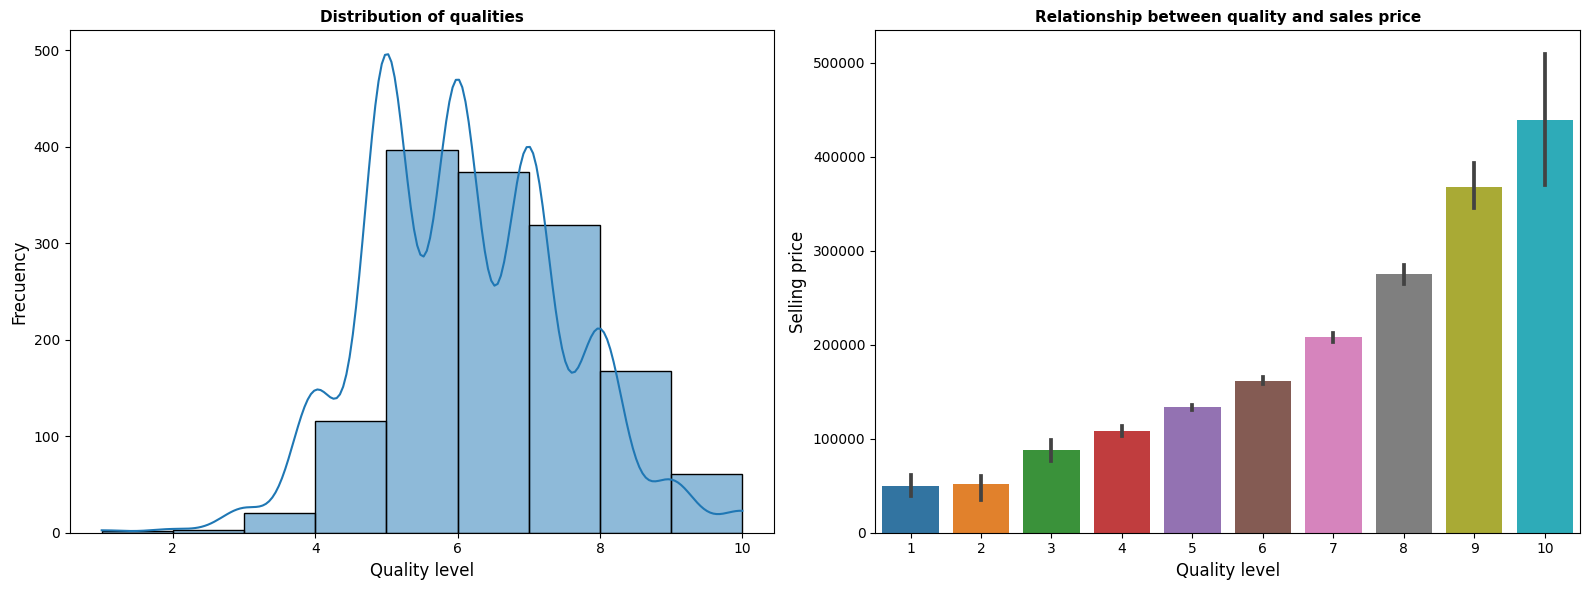

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))                                                                  # We create a grid for two graphs and give it size.

sns.histplot(data=train_clean, x='OverallQual', ax=axes[0], bins=range(1, 11), kde=True)                         # We create a histiogram with the OverallQual data indicating position, intervals and trend line.
axes[0].set_xlabel('Quality level', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Distribution of qualities', size=11, weight='bold')

sns.barplot(data=train_clean, x='OverallQual', y='SalePrice', ax=axes[1])                                        # We create a bar chart with the OverallQual vs SalePrice data and indicate its position.
axes[1].set_xlabel('Quality level', size=12) 
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between quality and sales price', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first histogram, the distribution of the quality of real estate in Ames is shown. It is evident that most of the properties fall in the medium-high quality range. This suggests that most of the homes in Ames are well maintained and offer a relatively high level of comfort and functionality.

- The second bar chart shows a clear correlation between the sales price and the quality level of the property. This indicates that the qualities of the property are a determining factor in property values. In other words, properties with a higher quality rating tend to have a higher selling price. This could be because buyers are willing to pay more for homes that offer more amenities, are better built or are better maintained.

#### GrLivArea
---
Square feet of living area above ground level (basements are not counted).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


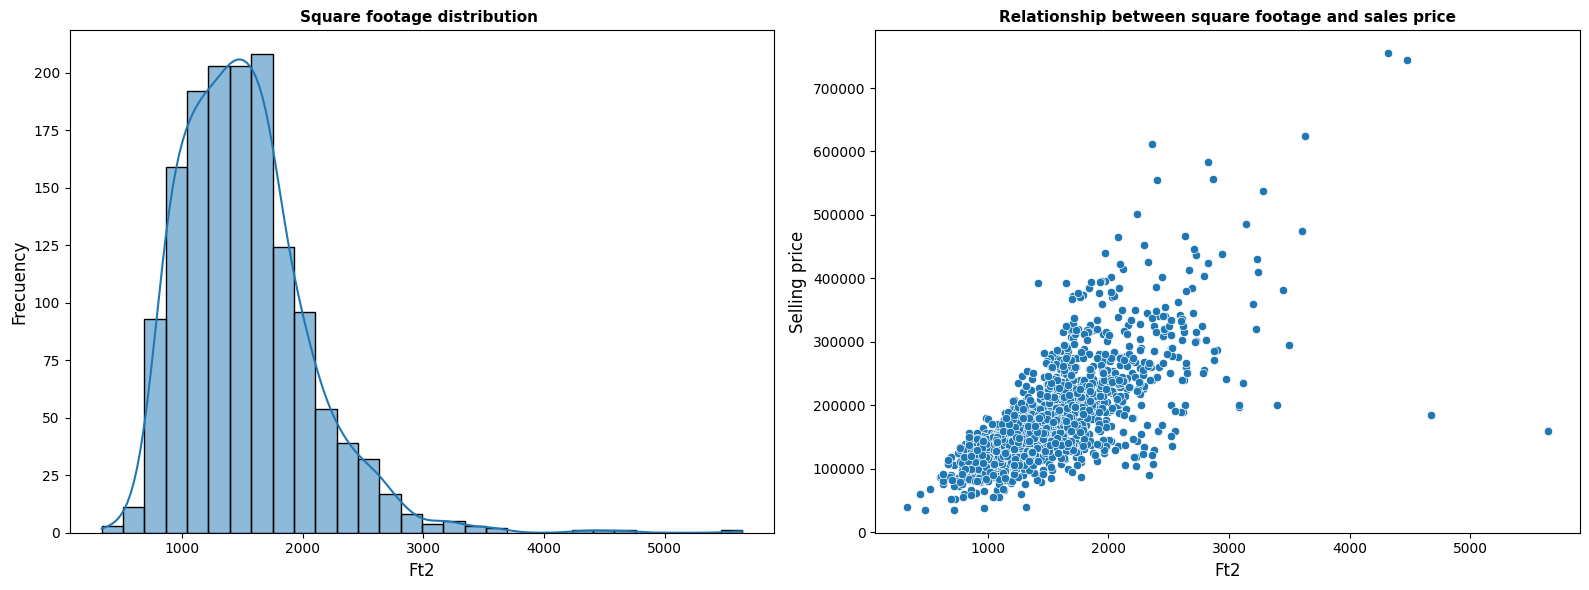

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean, x='GrLivArea', ax=axes[0], bins=30, kde=True)                                       # We create a histiogram with the variable GrLivArea, intervals and trend line.
axes[0].set_xlabel('Ft2', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Square footage distribution ', size=11, weight='bold')
 
sns.scatterplot(data=train_clean, x='GrLivArea', y='SalePrice', ax=axes[1])                                        # We create a scatter plot of GrLivArea data by SalePrice data.      
axes[1].set_xlabel('Ft2', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between square footage and sales price', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first histogram, we can see that the median housing size is usually around 1500 square feet (Ft²).

- In the second histogram, we see a scatter plot. In it, we can see the distribution of Ames housing stock price in relation to square footage (Ft²). We can see that despite the outliers there is a positive correlation between the variables, clearly suggesting that, in general, as the size of the house increases, so does its price. (I am sure that if we were to analyze this data in depth, it is possible that there are other variables influencing this conclusion).


#### GarageCars and GarageArea
---
It is time to analyze the variables related to the parking areas of the dwellings:

- GarageCar: Size of the garage in car capacity 2.

- GarageSurface: Size of the garage in square meters.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


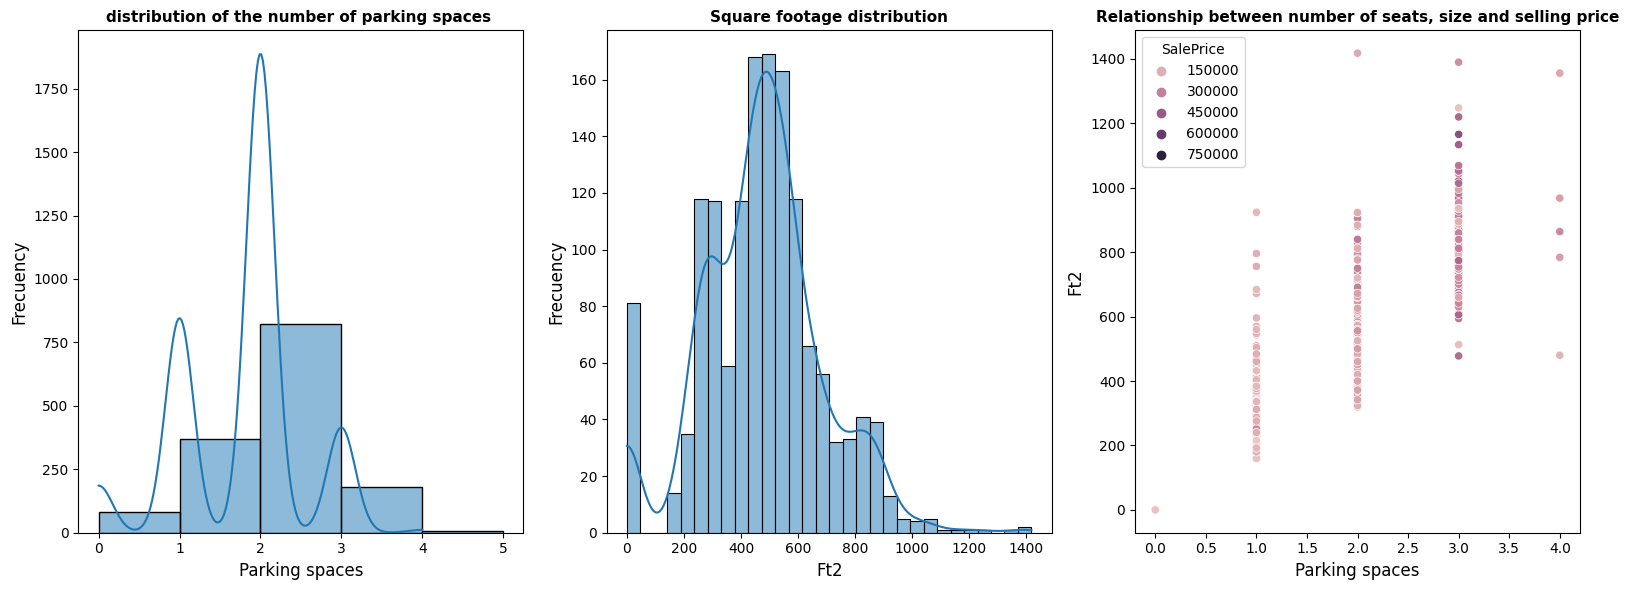

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))                                                                   # We create a grid for three charts

sns.histplot(data=train_clean, x='GarageCars', ax=axes[0], bins=range(6), kde=True)                               # We create a histiogram with the variable GarageCars, intervals and trend line.
axes[0].set_xlabel('Parking spaces', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('distribution of the number of parking spaces ', size=11, weight='bold')

sns.histplot(data=train_clean, x='GarageArea', ax=axes[1], bins=30, kde=True)                                     # We create a histiogram with the variable GarageArea, intervals and trend line. 
axes[1].set_xlabel('Ft2', size=12)
axes[1].set_ylabel('Frecuency', size=12)
axes[1].set_title('Square footage distribution', size=11, weight='bold')

sns.scatterplot(data=train_clean, x='GarageCars', y='GarageArea', hue='SalePrice', ax=axes[2])                    # We create a scatter plot of the GaraageCars and GarageArea data by SalePrice data.
axes[2].set_xlabel('Parking spaces', size=12)
axes[2].set_ylabel('Ft2', size=12)
axes[2].set_title('Relationship between number of seats, size and selling price', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first graph, the distribution of the number of parking spaces in the houses in Ames is shown. It can be seen that most homes have a garage with **1 or 2 parking spaces**. This suggests that most homes are designed to accommodate families with one or two vehicles.

- The second histogram represents the square footage of the garages. Here, a more uniform and similar distribution can be observed, with a mean of approximately **500 square feet**. This indicates that, regardless of the number of parking spaces, the average garage size tends to be constant.

- Finally, the relationship between the number of parking spaces, garage size and home sale price is shown. As expected, there is a positive correlation: the greater the number of spaces and the more garage space available, the higher the prices tend to be. However, there is an exception in areas with **4 spaces**, where prices appear to be comparable to those of homes with fewer spaces. This could be because these garages are relatively small to accommodate 4 vehicles compared to other garages of similar size.

#### TotalBsmtSF
---

Total square feet of basement area

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


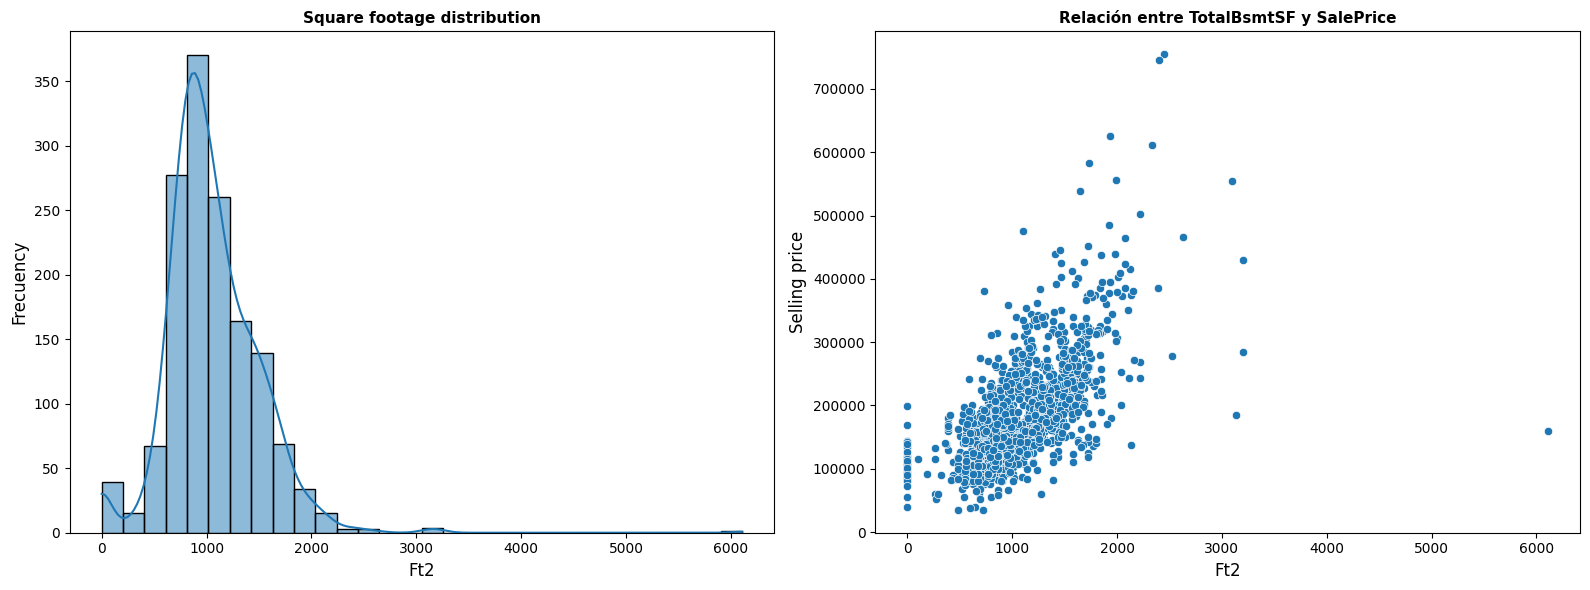

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean, x='TotalBsmtSF', ax=axes[0], bins=30, kde=True)                                    # We create a histiogram with the variable TotalBsmtSF, intervals and trend line.
axes[0].set_xlabel('Ft2', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Square footage distribution', size=11, weight='bold')

sns.scatterplot(data=train_clean, x='TotalBsmtSF', y='SalePrice', ax=axes[1])                                     # # We create a scatter plot of TotalBsmtSF by SalePrice data.
axes[1].set_xlabel('Ft2', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relación entre TotalBsmtSF y SalePrice', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first graph, a histogram representing the size distribution of basements in homes is shown. It can be seen that basements of approximately **1000 square feet** are the most common. This suggests that most homes are designed with basements of this size to maximize usable space without compromising the structure or design of the home.

- In the scatter plot, a trend can be seen indicating that as the size of the basement increases, the selling price also tends to increase. Although there are some outliers, the general trend suggests that larger basements can add value to a home. This could be due to the perception that a larger basement offers more space for storage or to be converted into additional living areas.

#### FullBath
---

Full bathrooms above grade

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


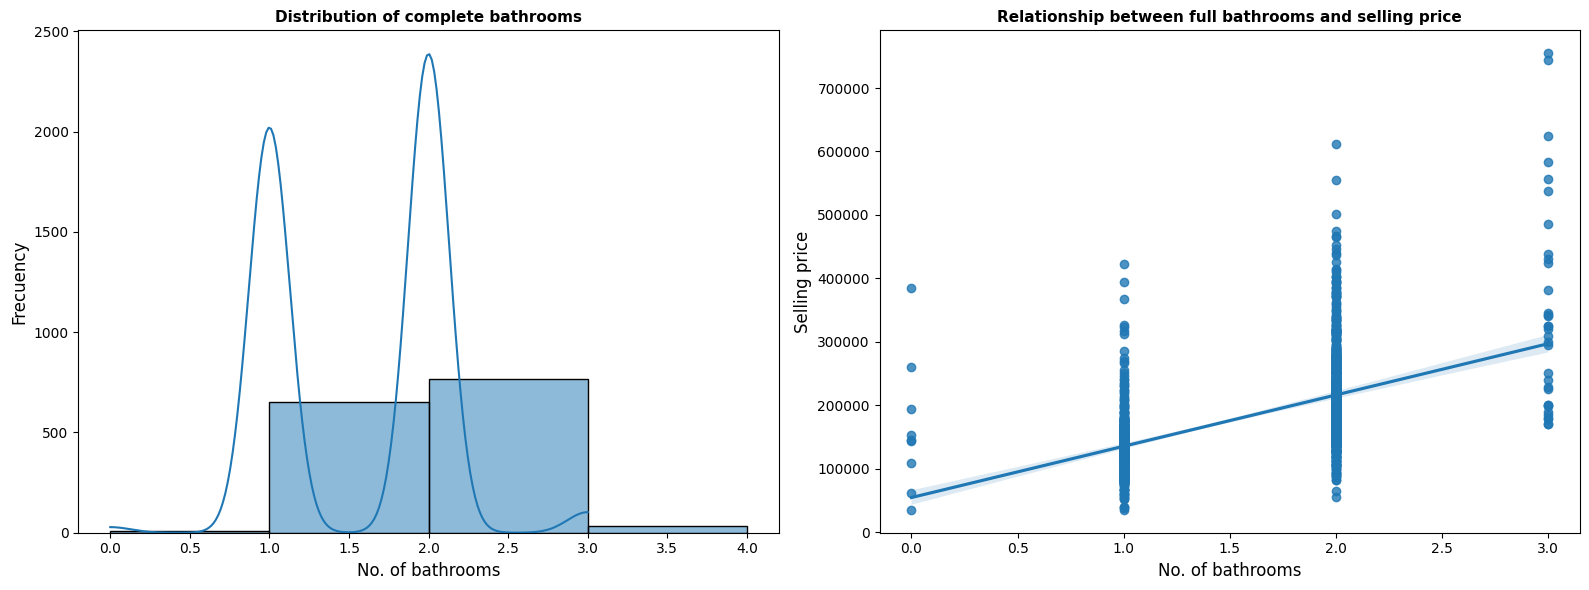

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean,  x='FullBath', ax=axes[0], bins=range(5), kde=True)
axes[0].set_xlabel('No. of bathrooms', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Distribution of complete bathrooms', size=11, weight='bold')

sns.regplot(data=train_clean, x='FullBath', y='SalePrice', ax=axes[1])
axes[1].set_xlabel('No. of bathrooms', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between full bathrooms and selling price', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first graph, it can be seen that the trend is for dwellings to have between **2 and 3 bathrooms**. This suggests that most homes are designed to accommodate small to medium-sized families, where 2 to 3 bathrooms would be sufficient to meet their needs.

- In the second graph, there is a clear trend that increasing the number of bathrooms in homes increases their value. This could be due to several factors, such as the perception of luxury or comfort associated with having more bathrooms, or the additional utility that additional bathrooms provide in a home.

#### GrLivArea
---

Above grade (ground) living area square feet

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


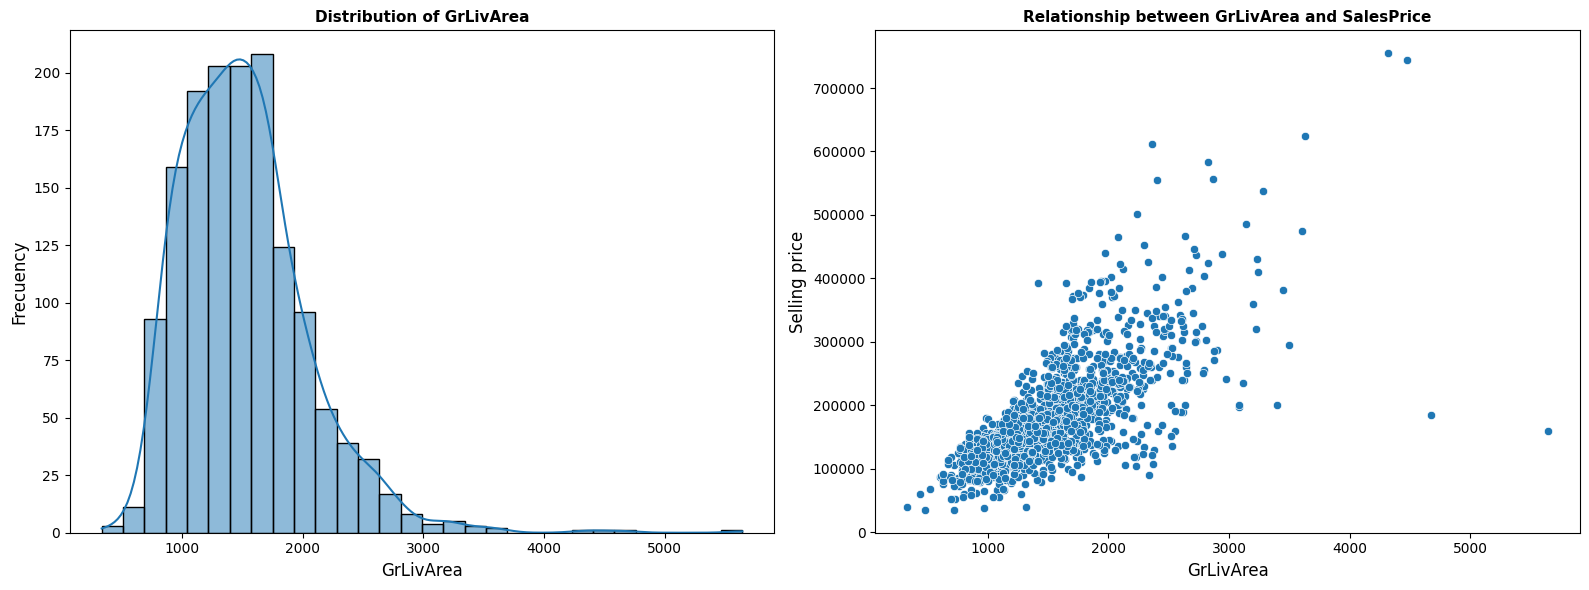

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean,  x='GrLivArea', ax=axes[0], bins=30, kde=True)
axes[0].set_xlabel('GrLivArea', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Distribution of GrLivArea', size=11, weight='bold')

sns.scatterplot(data=train_clean, x='GrLivArea', y='SalePrice', ax=axes[1])
axes[1].set_xlabel('GrLivArea', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between GrLivArea and SalesPrice', size=11, weight='bold')

plt.tight_layout()
plt.show()

- In the first graph, the distribution of the floor size of the real estate park in square feet is shown. It can be seen that most properties have a floor size ranging between **1000 and 2000 square feet**. As the floor size increases beyond this range, the number of properties progressively decreases, reaching up to **6000 square feet**.

- In the second graph, a scatter plot is presented showing the relationship between land size and the selling price of properties. Although there are some outliers, a general positive trend can be seen: as land size increases, so does the selling price. This suggests that land size can be an important factor in determining the value of a property.

#### YearBuilt
---
Original construction date

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


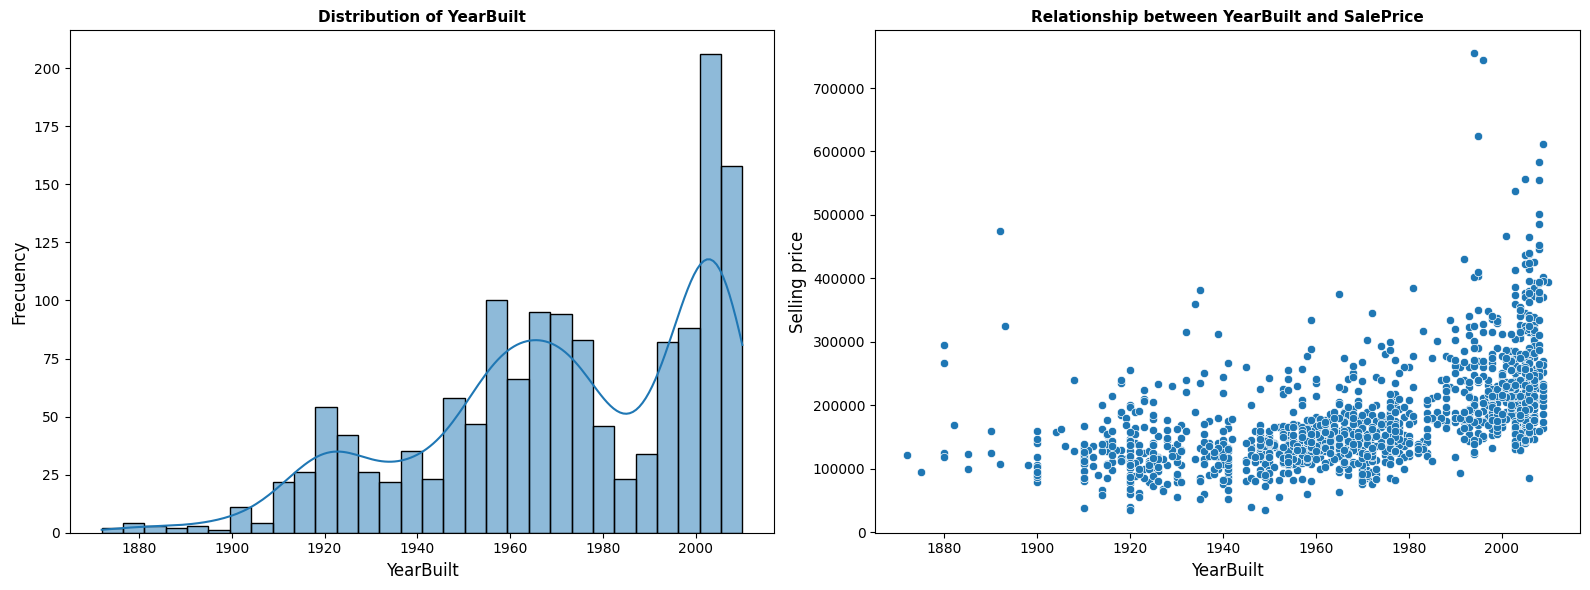

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean, x='YearBuilt', ax=axes[0], bins=30, kde=True)
axes[0].set_xlabel('YearBuilt', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Distribution of YearBuilt', size=11, weight='bold')

sns.scatterplot(data=train_clean, x='YearBuilt', y='SalePrice', ax=axes[1])
axes[1].set_xlabel('YearBuilt', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between YearBuilt and SalePrice', size=11, weight='bold')

plt.tight_layout()
plt.show()

- The first graph, a histogram, shows the trend and construction dates of Asmen's housing stock. An upward trend in the construction and expansion of the city of Asmen can be observed. There appear to be three major periods of expansion, with a clear trend of increasing construction in the number of dwellings.

- In the second graph, a scatter plot, the year of construction information is cross-referenced with the sales price. Although disparate data is observed, which is logical since every year houses of all types are built, we can observe a tendency for sale prices to increase as we move forward in time. This could indicate that property values in Asmen have been increasing over time, possibly due to factors such as inflation, increased demand or improvements in construction quality.

#### YearRemodAdd
---

Remodel date (same as construction date if no remodeling or additions)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


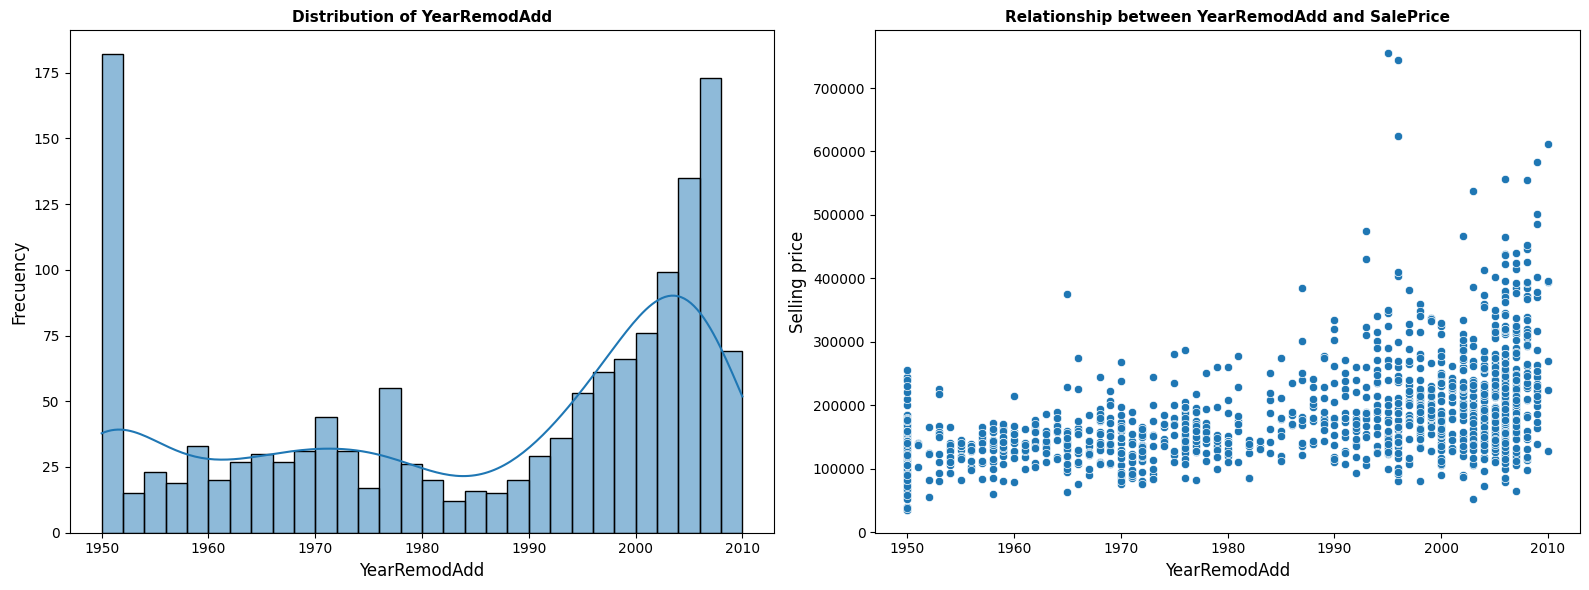

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=train_clean, x='YearRemodAdd', ax=axes[0], bins=30, kde=True)
axes[0].set_xlabel('YearRemodAdd', size=12)
axes[0].set_ylabel('Frecuency', size=12)
axes[0].set_title('Distribution of YearRemodAdd', size=11, weight='bold')

sns.scatterplot(data=train_clean, x='YearRemodAdd', y='SalePrice', ax=axes[1])
axes[1].set_xlabel('YearRemodAdd', size=12)
axes[1].set_ylabel('Selling price', size=12)
axes[1].set_title('Relationship between YearRemodAdd and SalePrice', size=11, weight='bold')

plt.tight_layout()
plt.show()

- The first histogram shows the distribution over time of the renovations carried out in the dwellings. A significant increase in renovations can be observed from the 1990s onwards, which decreases at the end of the 2000s. This could indicate a period of intensive renovation in the housing stock during that time.

- In the second scatter plot, one can see the relationship between house prices and renovations carried out over time. The graph appears fairly stable with a somewhat upward trend, but from the 1990s onwards, renovations increase (as we saw in the previous graph) and in turn the selling price. This suggests that renovations may have added value to the homes, resulting in an increase in selling prices. However, it is also possible that other factors may have contributed to the increase in prices during this period.

**5.** Predictions 
---
After a not as thorough analysis as I would have liked, but with a deeper understanding of the data, we are ready to tackle the main part of the challenge.

In this section we will tackle different regression methods to analyze their use, in search of the best results.

### Simple linear regression
---
We will begin our predictions by applying the most fundamental regression model. 
Simple linear regression is a statistical method that allows us to summarize and study the relationships between two continuous quantitative variables, a dependent variable and an independent variable.

It is an ideal model for simple relationships between two variables.

The advantage is that this model is very easy to understand, quick to model and does not experience much overfitting. 

The disadvantage is that it fits complex problems poorly.

The formula we use to make our estimates is called the hypothesis function:

$$y = a + bx + e$$

Let's put it into practice:

In [25]:
X_train = train_clean[['OverallQual']]
y_train = train_clean['SalePrice']
X_test = test_clean[['OverallQual']]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

simple_predictions = lr_model.predict(X_test)

rmse_simple = np.sqrt(mean_squared_error(y_train, lr_model.predict(X_train)))
r2_simple = r2_score(y_train, lr_model.predict(X_train))

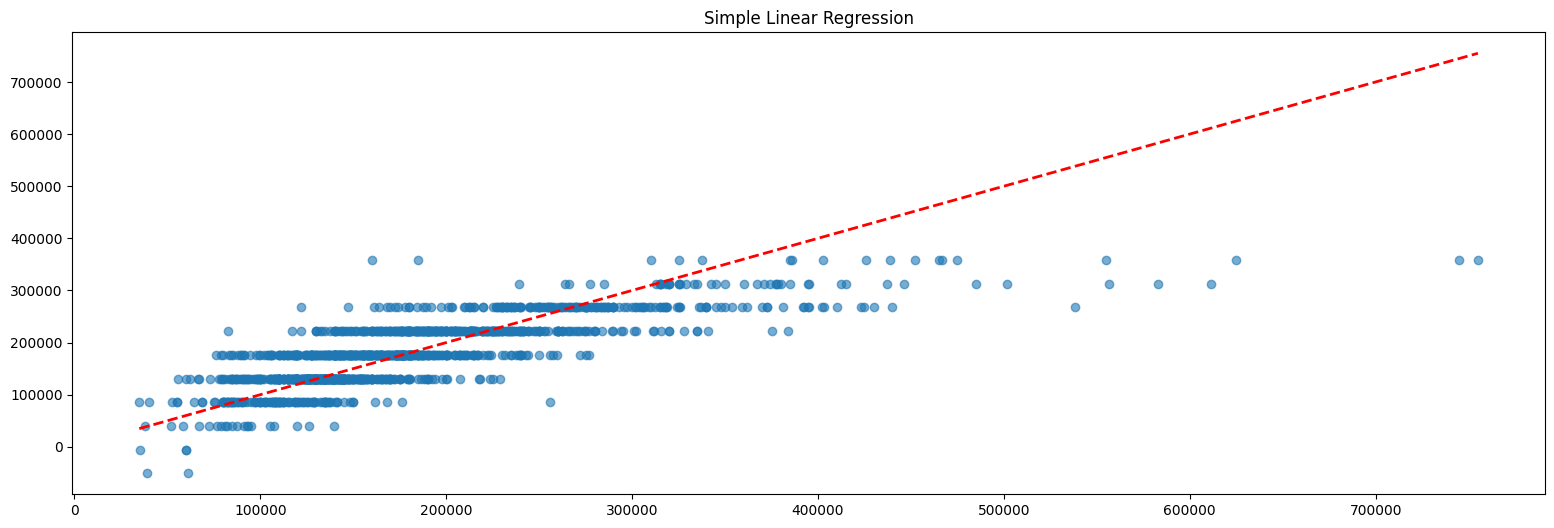

Simple Linear Regression RMSE: 48589.44712143806
Simple Linear Regression  R-squared: 0.625651892462118


In [26]:
plt.figure(figsize=(19, 6))
plt.scatter(y_train, lr_model.predict(X_train), alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('')
plt.ylabel('')
plt.title('Simple Linear Regression')
plt.show()


print(f"Simple Linear Regression RMSE: {rmse_simple}")
print(f"Simple Linear Regression  R-squared: {r2_simple}")

Ok, as we have already mentioned, we can observe a wide margin of improvement in the results obtained. This is because the relationship between the independent variable and the dependent variable cannot capture all the complexity of the problem. 

Let us now try a linear regression with several features.

### Multiple linear regression
---
Multiple linear regression extends simple linear regression by allowing the model to include multiple independent variables. This statistical method models the relationship between a dependent variable and two or more independent variables by fitting a linear equation to the observed data.

This model is ideal for problems with multiple predictive characteristics and linear relationships.

The advantage of multiple linear regression is that it can handle more complex relationships and provide more accurate predictions by accounting for multiple factors. However, it also increases the risk of overfitting, especially when the number of predictors is large.

The formula we use to make our estimates is:

$$y = a + b_1x_1 + b_2x_2 + ... + b_nx_n + e$$

Let's see it in action:

In [27]:
X = train_clean.drop(columns=['SalePrice'])
y = train_clean['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)                                 

y_pred = model.predict(X_test)

test_clean_aligned = test_clean[X.columns]
test_clean_scaled = scaler.transform(test_clean_aligned)
test_predictions = model.predict(test_clean_scaled)

rmse_multiple = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))
r2_multiple = r2_score(y_test, y_pred)

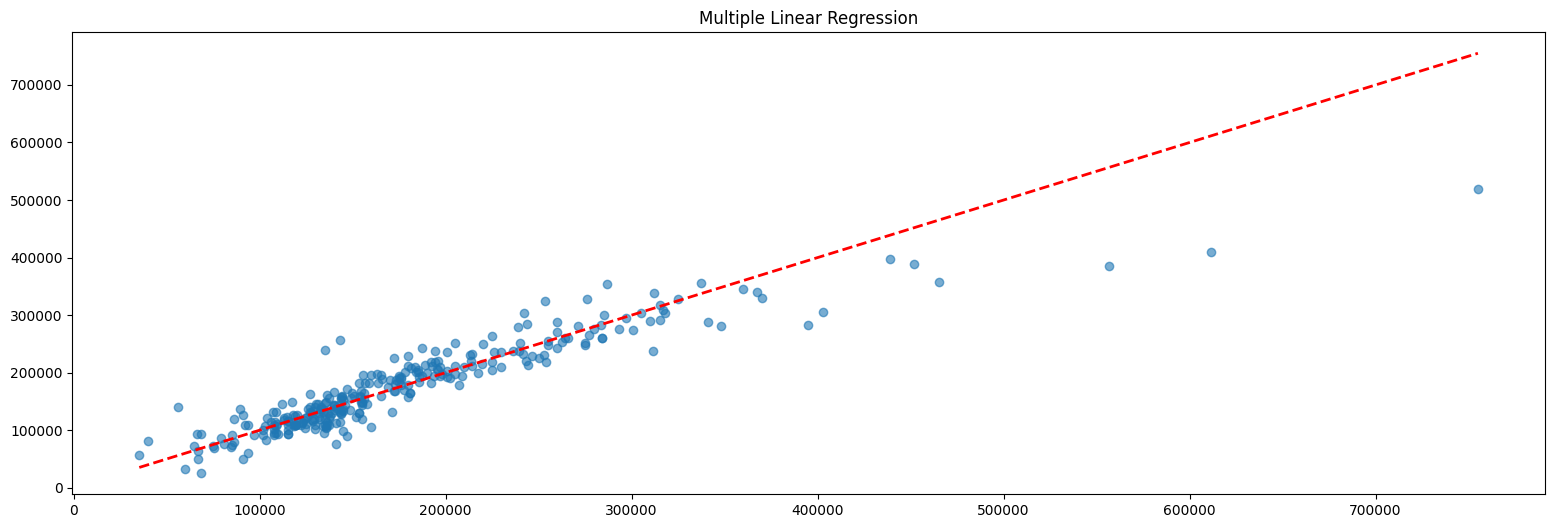

Multiple Linear Regression RMSE: 0.18666615305165168
Multiple Linear Regression R-squared: 0.8486227340014043


In [28]:
plt.figure(figsize=(19, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('')
plt.ylabel('')
plt.title('Multiple Linear Regression')
plt.show()

print(f"Multiple Linear Regression RMSE: {rmse_multiple}")
print(f"Multiple Linear Regression R-squared: {r2_multiple}")

Excellent!

Unlike the simple regression, we can see that the RMSE has increased and is quite tight at 0.18 points, and the R-squared is also well placed, indicating that it can predict the value of the houses in 84.86% of the cases.

We will now move on to other slightly more advanced models. 
We will continue with a Ridge regression.

### Ridge Regression
---
Ridge regression is a type of linear regression that includes a regularization term to penalize large coefficients. This regularization helps to avoid overfitting by adding a penalty equal to the square of the magnitude of the coefficients. It is particularly useful when there is multicollinearity between the independent variables.

It can become very useful in economic and financial modeling, where the variables are highly correlated.

The Ridge regression formula is similar to that of multiple linear regression, but with a regularization term added:

$$y = a + b_1x_1 + b_2x_2 + ... + b_nx_n + \lambda \sum_{i=1}^n b_i^2 + e$$
where \(\lambda) is the regularization parameter.

In [29]:
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
test_predictions_ridge = best_ridge.predict(test_clean_scaled)

rmse_ridge = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_ridge)))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression RMSE: 0.1749492919534534
Ridge Regression R-squared: 0.8492755914886625


Great! The results show an RMSE on the logarithmic scale of 0.17 and an R-squared of 0.849, indicating a very good fit, with fairly accurate predictions and a very robust capability. 

Now, we will proceed to perform a Lasso regression to compare their performance.

### Lasso Regression
---
Lasso Regression, or Absolute Minimum Selection and Reduction Operator, is another type of linear regression that includes a regularization term. Unlike Ridge Regression, Lasso adds a penalty equal to the absolute value of the magnitude of the coefficients. This not only helps to avoid overfitting, but can also result in sparse models in which some coefficients are exactly zero, effectively selecting a simpler model.

It is often recommended for regression models that require some selection of characteristics and settings, making it useful in fields such as genetics and econometrics.

The formula for the Lasso regression is:

$$y = a + b_1x_1 + b_2x_2 + ... + b_nx_n + sum_{i=1}^n |b_i| + e$$

where \(\lambda) is the regularization parameter.

In [30]:
lasso = Lasso(max_iter=20000)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)
test_predictions_lasso = best_lasso.predict(test_clean_scaled)

rmse_lasso = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_lasso)))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression R-squarede: {r2_lasso}")

Lasso Regression RMSE: 0.18353263960290886
Lasso Regression R-squarede: 0.8482503465302562


Perfect! 

The Lasso regression results also show very promising results, very similar to those obtained with Ridge an RMSE on the log scale of 0.18 and an R-squared on the original scale of 0.848. Lasso performs slightly less well, but is still robust.

### KNeighborsRegressor
---
KNeighborsRegressor is a type of instance-based learning or non-generalizing learning that predicts the value of a query point based on the mean of the values of its nearest neighbors in the training set.

I have added it to give a complete picture, but KNeighborsRegressor is oriented for nonparametric and nonlinear regression problems.

It is very useful in recommender systems and behavior prediction.

The formula for KNN regression is.

$$\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i$$

where \(k) is the number of nearest neighbors and \(y_i) are the target values of the nearest neighbors.

In [31]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_knn)))
knn_r2 = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {knn_rmse}")
print(f"KNN Regression R-squared: {knn_r2}")

KNN Regression RMSE: 0.20105685408538435
KNN Regression R-squared: 0.7834601888926717


As mentioned above, the results reflect the model's inability to predict housing prices robustly.

### ElasticNet
---
ElasticNet is a regularized regression method that linearly combines the L1 and L2 penalties of the Lasso and Ridge methods. It is useful when there are multiple features correlated with each other.

ElasticNet is a widely used model in the fields of bioinformatics, signal processing, and high-dimensional data analysis.

The ElasticNet formula is:

$$y = a + b_1x_1 + b_2x_2 + ... + b_nx_n + \lambda_1 \sum_{i=1}^{n} |b_i| + \lambda_2 \sum_{i=1}^{n} b_i^2 + e$$

where \(\lambda_1\) and \(\lambda_2\) are the regularization parameters.

In [32]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_en = elastic_net.predict(X_test)

# Calcular el RMSE en la escala logarítmica y R-squared en la escala original
en_rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_en)))
en_r2 = r2_score(y_test, y_pred_en)

print(f"ElasticNet RMSE: {en_rmse}")
print(f"ElasticNet R-squared: {en_r2}")

ElasticNet RMSE: 0.16032988948736024
ElasticNet R-squared: 0.8386008659579931


The results are quite significant.

Although we obtained a lower r-squared than other models, we see how the RMSE has been reduced making the predictions tighter in spite of the errors.

### GradientBoostingRegressor
---
GradientBoostingRegressor is an ensemble technique that builds models sequentially, each correcting the errors of the previous one. It combines weak learners, usually decision trees, in stages to minimize the loss function.

It is an especially useful model for regression problems where high accuracy is needed and is typically used in sales prediction and fraud detection tasks.

The formula for Gradient Boosting is:

$$F_{m}(x) = F_{m-1}(x) + €€ h_m(x)$$

where \(F_m(x)\) is the updated model, \(h_m(x)\) is the new weak learner, and \(\nu) is the learning rate.

In [33]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_gb = gb.predict(X_test)

# Calcular el RMSE en la escala logarítmica y R-squared en la escala original
gb_rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_gb)))
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {gb_rmse}")
print(f"Gradient Boosting R-squared: {gb_r2}")

Gradient Boosting RMSE: 0.14825171943135593
Gradient Boosting R-squared: 0.8873317408144762


Great!

We can observe a significant improvement in both RMSE and R2

### RandomForestRegressor
---
RandomForestRegressor is a learning method that builds multiple decision trees during training and outputs the average prediction of the individual trees to improve predictive accuracy and thus control overfitting.
It works well for both classification and regression tasks as it reduces variance by averaging over multiple decision trees.

It is a highly valued method for carrying out complex regression problems with non-linear relationships between characteristics and objective. Which makes it very useful for large and noisy data sets.

The formula for Random Forest prediction is:

$$\hat{y} = \frac{1}{T} \sum _{t=1}^{T} h_t(x)$$

where \(T\) is the total number of trees and \(h_t(x)\) is the prediction of the \(t\)th tree.

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_rf)))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest RMSE: 0.15420551148130945
Random Forest R-squared: 0.8924144189682909


Very good! 

We see how the number of hits increases. However, when the model makes errors, they tend to be of greater magnitude, which is reflected in a greater distance between the points.

### Generalized Linear Models (GLM)
---
Generalized linear models extend linear regression to models that can handle non-normal response distributions. They consist of a linear predictor and a link function that relates the linear predictor to the mean of the distribution function.

This model is widely used in risk analysis, biomedicine and social research.

The formula for a GLM is:

$$g(\mathbb{E}(Y)) = \eta = X\beta$$

where \(g\) is the link function, \(\eta\) is the linear predictor, \(X\) is the input feature matrix and \(\beta\) are the coefficients.

In [35]:
import statsmodels.api as sm

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

glm_model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
glm_results = glm_model.fit()

y_pred_glm = glm_results.predict(X_test)

glm_rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_glm)))
glm_r2 = r2_score(y_test, y_pred_glm)

print(f"GLM RMSE: {glm_rmse}")
print(f"GLM R-squared: {glm_r2}")

GLM RMSE: 0.18710283435601874
GLM R-squared: 0.8486931957511197


We can observe that the results obtained with this last model are similar to the average. 

With this final data, we will proceed to make a comparison between the different systems in order to select the one that offers the highest efficiency and accuracy.

In [36]:
results_df = pd.DataFrame({
    'Model': [
        'Simple Linear Regression', 
        'Multiple Linear Regression', 
        'Ridge Regression', 
        'Lasso Regression', 
        'ElasticNet', 
        'KNeighborsRegressor', 
        'GradientBoostingRegressor', 
        'RandomForestRegressor',  
        'GLM'
    ],
    'Log RMSE': [rmse_simple, rmse_multiple,rmse_ridge,rmse_lasso,knn_rmse,en_rmse,gb_rmse,rf_rmse,glm_rmse,],
    'R-squared': [r2_simple,r2_multiple,r2_ridge,r2_lasso,knn_r2,en_r2,gb_r2,rf_r2,glm_r2]
})

results_df = results_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)

print(results_df)

                        Model      Log RMSE  R-squared
0       RandomForestRegressor      0.154206   0.892414
1   GradientBoostingRegressor      0.148252   0.887332
2            Ridge Regression      0.174949   0.849276
3                         GLM      0.187103   0.848693
4  Multiple Linear Regression      0.186666   0.848623
5            Lasso Regression      0.183533   0.848250
6         KNeighborsRegressor      0.160330   0.838601
7                  ElasticNet      0.201057   0.783460
8    Simple Linear Regression  48589.447121   0.625652


Once the scores achieved by the regression models have been evaluated, we will proceed to export the CSV.
In this case, although some

Although the RandomForestRegressor has a slightly better R-squared, the GradientBoostingRegressor has a lower RMSE. 

In general, a lower RMSE indicates better predictions. And therefore, I personally choose the GradientBoostingRegressor because of its lower RMSE, which indicates better prediction accuracy.

In [37]:
test_predictions_gb = gb.predict(test_clean_scaled)

# Crear el archivo de envío
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_predictions_gb
})

print(submission.head())
submission.to_csv('/kaggle/working/submission.csv', index=False)


     Id      SalePrice
0  1461  123267.559467
1  1462  156418.364837
2  1463  177243.002877
3  1464  183674.121209
4  1465  203139.282451


## **6.** Conclusions
---

In this project, we have taken on the challenge of predicting housing prices in Ames using basic regression models. Throughout our analysis, we followed a number of key steps that allowed us to obtain promising results and improve our understanding of the data set by examining how different attributes of homes influence their selling prices.

1. **Data preparation and cleaning**: 

    We thoroughly cleaned the data set by addressing missing values, coding categorical variables, and performing feature engineering. This prepared the data for effective modeling.

2. **Data analysis**: 

    We explored the relationships between the features and the target variable, Sales Price, using visualization and correlation analysis. This helped us to understand the influence of different attributes on home price.

4. **Model implementation**:

    We implemented several regression models, including simple linear regression, multiple linear regression, Ridge regression, Lasso regression, KNeighborsRegressor, ElasticNet, GradientBoostingRegressor, RandomForestRegressor, and GLM. Each model was evaluated using RMSE and R-squared metrics.

5. **Comparison of results**: 

    The comparison revealed that the models that performed the best preditions were RandomForestRegressor and the GradientBoostingRegressor which obtained the best results. And although the RandomForestRegressor had a slightly better R2, the GradientBoostingRegressor had a lower RMSE, which made us opt for it given its prediction accuracy.

6. **Possible improvements**: 

    To further refine our regression results, we might consider doing more work on feature engineering or testing other deep learning algorithms, which could help reduce multicollinearity and improve the results.

Although we have obtained promising results, there is always room for improvement. This project could serve as a starting point for future research and improvements in housing price prediction.

Thank you for taking the time to read this notebook.

**If you liked it, don't forget to UPVOTE 😉**

We keep on working!